# Tensor Renormalization Group for 2d Ising model for various L
2020, July, Tsuyoshi Okubo  
2021, July, Tsuyoshi Okubo  
2023, March, Tsuyoshi Okubo

This code simulate 2d Ising model on the square lattice, whose Hamiltonian is given by
 $$ \mathcal{H} = -J \sum_{\langle i,j\rangle} S_i S_j$$
where $S_i = \pm 1$. 

We will calculate the free energy density, $f$, of the system based on Tensor Renormalization Group (TRG) proposed in M. Levin and C. P. Nave, PRL **99** 120601 (2007).

Then by using numerical differentiation, we will caluculate 
* energy density: $E = f - T \frac{d f}{d T}$
* specific heat: $C = \frac{d E}{d T} = -T\frac{d^2 f}{d T^2}$

Here we compare different $L$ with fixed bond dimension $D$.

#### Parameters for TRG simulations
* n: the system size which corresponds to $L = 2^{n}$ for $L\times L$ square lattice. 
* D: Bond dimension. It is used as maximum value to keep at the low rank apporximation based on SVD. 

In [1]:
import numpy as np
try:
    import TRG_lib
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/Introduction-to-Tensor-Network/main/Exercise/TRG_lib.py
    import TRG_lib

import pickle
import os

%matplotlib inline
from matplotlib import pyplot

In [2]:
Tc = 2.0/np.log(1.0+np.sqrt(2.0)) ## The critical temperature of the Ising model 

### input parameters ###
n_max = 6 
n_min = 3

T_min = 2.0
T_max = 2.7
T_step = 0.01

D = 4 ## bond dimension

data_file = "trgdata_D"+repr(D)+".dat" ## Simulation data will be seved to this file.
### input parameters ###




n_list = np.arange(n_min, n_max+1)
T_list=np.arange(T_min,T_max,T_step)

L_list = 2**n_list
TRG_step = 2*n_list -1

T_list_all = []
for L in L_list:
    T_list_all.append(T_list)
## You may prepare different temperature set depending on L






In [3]:
def Calculate_EC(T,f):
    T_num = len(T)
    E = np.empty(T_num-2)
    C = np.empty(T_num-2)
    T_cut = np.empty(T_num-2)
    for i in range(0,T_num-2):
        E[i] = f[i+1]-T[i+1] * (f[i+2]-f[i])/(T[i+2]-T[i])
        C[i] = -T[i+1] * (f[i+2]+f[i]-2.0*f[i+1])/(T[i+2]-T[i+1])**2
        T_cut[i] = T[i+1]
    return T_cut,E,C



In [4]:
%%time
free_energy_density_all = []
for i in range(len(L_list)):
    free_energy_density = []
    print("L = "+repr(L_list[i]))
    for T in T_list_all[i]:
        free_energy_density.append(TRG_lib.TRG_Square_Ising(T,D,TRG_step[i],Energy_flag=False))
    free_energy_density_all.append(free_energy_density)

L = 8
T, free_energy_density = 2.0 -2.072718391932556
T, free_energy_density = 2.01 -2.0743441870325166
T, free_energy_density = 2.0199999999999996 -2.0760051261085546
T, free_energy_density = 2.0299999999999994 -2.07770185694841
T, free_energy_density = 2.039999999999999 -2.0794350362089973
T, free_energy_density = 2.049999999999999 -2.0812053288133003
T, free_energy_density = 2.0599999999999987 -2.0830134072313746
T, free_energy_density = 2.0699999999999985 -2.0848599506378007
T, free_energy_density = 2.0799999999999983 -2.0867456439383267
T, free_energy_density = 2.089999999999998 -2.0886711766592096
T, free_energy_density = 2.099999999999998 -2.0906372416934973
T, free_energy_density = 2.1099999999999977 -2.092644533899686
T, free_energy_density = 2.1199999999999974 -2.0946937485493513
T, free_energy_density = 2.1299999999999972 -2.096785579621942
T, free_energy_density = 2.139999999999997 -2.098920717946589
T, free_energy_density = 2.149999999999997 -2.1010998491927424
T, free_ene

T, free_energy_density = 2.509999999999989 -2.202687745116793
T, free_energy_density = 2.519999999999989 -2.2071100637524537
T, free_energy_density = 2.5299999999999887 -2.2115649922988534
T, free_energy_density = 2.5399999999999885 -2.216051725353808
T, free_energy_density = 2.5499999999999883 -2.2205694942255123
T, free_energy_density = 2.559999999999988 -2.2251175638240266
T, free_energy_density = 2.569999999999988 -2.2296952299913113
T, free_energy_density = 2.5799999999999876 -2.2343018171859
T, free_energy_density = 2.5899999999999874 -2.2389366764569196
T, free_energy_density = 2.599999999999987 -2.2435991836563467
T, free_energy_density = 2.609999999999987 -2.248288737849288
T, free_energy_density = 2.619999999999987 -2.253004759890366
T, free_energy_density = 2.6299999999999866 -2.257746691140713
T, free_energy_density = 2.6399999999999864 -2.2625139923050908
T, free_energy_density = 2.649999999999986 -2.2673061423724414
T, free_energy_density = 2.659999999999986 -2.2721226376

In [5]:
 ## Caluculate Energy and Specific heat by numerical differentiation
T_cut_all = []
E_all = []
C_all = []
for i in range(len(L_list)):
    T_cut, E, C = Calculate_EC(T_list_all[i], free_energy_density_all[i])
    T_cut_all.append(T_cut)
    E_all.append(E)
    C_all.append(C)
    
## save data
f = open(data_file,"wb")
obs_list_all = [free_energy_density_all, E_all, C_all, L_list,T_list_all,T_cut_all]
pickle.dump(obs_list_all,f)
f.close

<function BufferedWriter.close>

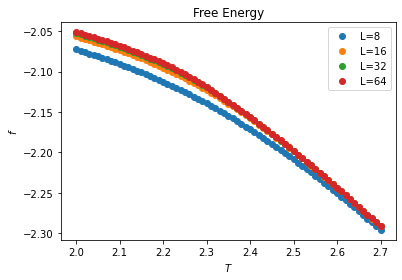

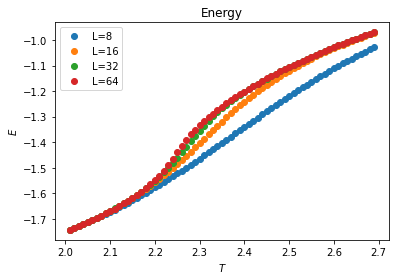

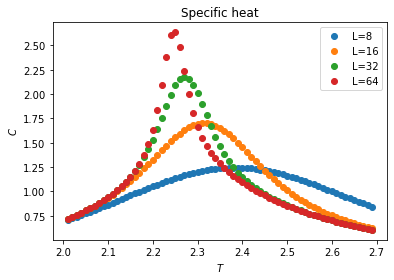

In [6]:
## plot observables
pyplot.figure()
pyplot.title("Free Energy")
pyplot.xlabel("$T$")
pyplot.ylabel("$f$")
for i in range(len(L_list)):
    pyplot.plot(T_list_all[i],free_energy_density_all[i],"o",label = "L="+repr(L_list[i]))
pyplot.legend()

pyplot.figure()
pyplot.title("Energy")
pyplot.xlabel("$T$")
pyplot.ylabel("$E$")

for i in range(len(L_list)):
    pyplot.plot(T_cut_all[i],E_all[i],"o",label = "L="+repr(L_list[i]))
pyplot.legend()

pyplot.figure()
pyplot.title("Specific heat")
pyplot.xlabel("$T$")
pyplot.ylabel("$C$")
for i in range(len(L_list)):
    pyplot.plot(T_cut_all[i],C_all[i],"o",label = "L="+repr(L_list[i]))
pyplot.legend()